# Assignment 4: Benchmarking Neural Nets with the XOR Problem

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [1]:
# You might want to use the following packages
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


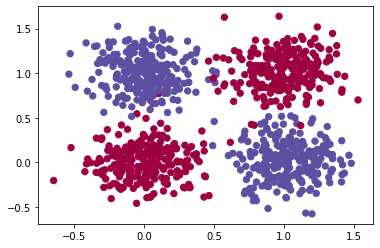

In [2]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49) 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [7]:
from time import time
starting = time()
import tensorflow as tf
from tensorflow import keras
from scipy.stats import reciprocal
from sklearn.model_selection import GridSearchCV

tf.random.set_seed(42)

def build_model(n_neurons, learning_rate):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=2))
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(2, activation='softmax'))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

param_distribs = {
    "n_neurons": [25, 50, 100],
    "learning_rate": [0.005, 0.01, 0.05]
}

keras_reg = keras.wrappers.scikit_learn.KerasClassifier(build_model)

rnd_search_cv = GridSearchCV(keras_reg, param_distribs, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
rnd_search_cv.best_params_
print(time() - starting)

Epoch 1/100
30/30 [==============================] - 0s 7ms/step - loss: 0.7292 - accuracy: 0.5771 - val_loss: 0.6933 - val_accuracy: 0.6600
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.6479 - val_loss: 0.6811 - val_accuracy: 0.6700
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.6771 - val_loss: 0.6726 - val_accuracy: 0.6850
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6708 - val_loss: 0.6663 - val_accuracy: 0.6700
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6354 - val_loss: 0.6611 - val_accuracy: 0.6350
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5667 - val_loss: 0.6566 - val_accuracy: 0.5950
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5646 - val_loss: 0.6524 - val_accuracy: 0.5600
Epoch 8/100
3

Epoch 59/100
30/30 [==============================] - 0s 993us/step - loss: 0.4650 - accuracy: 0.9646 - val_loss: 0.4703 - val_accuracy: 0.9500
Epoch 60/100
30/30 [==============================] - 0s 999us/step - loss: 0.4612 - accuracy: 0.9667 - val_loss: 0.4669 - val_accuracy: 0.9500
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.9667 - val_loss: 0.4633 - val_accuracy: 0.9500
Epoch 62/100
30/30 [==============================] - 0s 994us/step - loss: 0.4539 - accuracy: 0.9646 - val_loss: 0.4598 - val_accuracy: 0.9500
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.9646 - val_loss: 0.4563 - val_accuracy: 0.9500
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.9646 - val_loss: 0.4530 - val_accuracy: 0.9500
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.9646 - val_loss: 0.4494 - val_accuracy: 0.9500


Epoch 16/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.9042 - val_loss: 0.5934 - val_accuracy: 0.9050
Epoch 17/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.9083 - val_loss: 0.5888 - val_accuracy: 0.9150
Epoch 18/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.9187 - val_loss: 0.5842 - val_accuracy: 0.9150
Epoch 19/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.9271 - val_loss: 0.5796 - val_accuracy: 0.9200
Epoch 20/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.9375 - val_loss: 0.5751 - val_accuracy: 0.9250
Epoch 21/100
30/30 [==============================] - 0s 990us/step - loss: 0.5758 - accuracy: 0.9458 - val_loss: 0.5706 - val_accuracy: 0.9300
Epoch 22/100
30/30 [==============================] - 0s 983us/step - loss: 0.5709 - accuracy: 0.9542 - val_loss: 0.5661 - val_accuracy: 0.9300
Ep

30/30 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.9729 - val_loss: 0.5438 - val_accuracy: 0.9250
Epoch 31/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5416 - accuracy: 0.9750 - val_loss: 0.5400 - val_accuracy: 0.9300
Epoch 32/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.9792 - val_loss: 0.5361 - val_accuracy: 0.9400
Epoch 33/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.9792 - val_loss: 0.5322 - val_accuracy: 0.9500
Epoch 34/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.9792 - val_loss: 0.5283 - val_accuracy: 0.9550
Epoch 35/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.9812 - val_loss: 0.5244 - val_accuracy: 0.9550
Epoch 36/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.9854 - val_loss: 0.5205 - val_accuracy: 0.9550
Epoch 37/100
30/30 

Epoch 88/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.9917 - val_loss: 0.3276 - val_accuracy: 0.9700
Epoch 89/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.9917 - val_loss: 0.3245 - val_accuracy: 0.9700
Epoch 90/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.9917 - val_loss: 0.3214 - val_accuracy: 0.9700
Epoch 91/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.9917 - val_loss: 0.3184 - val_accuracy: 0.9700
Epoch 92/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.9917 - val_loss: 0.3154 - val_accuracy: 0.9700
Epoch 93/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.9917 - val_loss: 0.3125 - val_accuracy: 0.9700
Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.9917 - val_loss: 0.3096 - val_accuracy: 0.9700
Epoch 

30/30 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5979 - val_loss: 0.6878 - val_accuracy: 0.5950
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6667 - val_loss: 0.6785 - val_accuracy: 0.6250
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6958 - val_loss: 0.6705 - val_accuracy: 0.6600
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.7104 - val_loss: 0.6638 - val_accuracy: 0.6900
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.7146 - val_loss: 0.6578 - val_accuracy: 0.6950
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7146 - val_loss: 0.6524 - val_accuracy: 0.7000
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.7208 - val_loss: 0.6473 - val_accuracy: 0.7000
Epoch 9/100
30/30 [======

Epoch 60/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.9667 - val_loss: 0.4447 - val_accuracy: 0.9600
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.9646 - val_loss: 0.4411 - val_accuracy: 0.9600
Epoch 62/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.9667 - val_loss: 0.4375 - val_accuracy: 0.9600
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.9646 - val_loss: 0.4339 - val_accuracy: 0.9600
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.9646 - val_loss: 0.4304 - val_accuracy: 0.9600
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.9667 - val_loss: 0.4268 - val_accuracy: 0.9600
Epoch 66/100
30/30 [==============================] - ETA: 0s - loss: 0.4277 - accuracy: 1.00 - 0s 1ms/step - loss: 0.4163 - accuracy: 0.9646 - val_

Epoch 17/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.9438 - val_loss: 0.5882 - val_accuracy: 0.9450
Epoch 18/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.9438 - val_loss: 0.5841 - val_accuracy: 0.9550
Epoch 19/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.9458 - val_loss: 0.5801 - val_accuracy: 0.9550
Epoch 20/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.9458 - val_loss: 0.5761 - val_accuracy: 0.9550
Epoch 21/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.9521 - val_loss: 0.5721 - val_accuracy: 0.9600
Epoch 22/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.9458 - val_loss: 0.5681 - val_accuracy: 0.9600
Epoch 23/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5669 - accuracy: 0.9500 - val_loss: 0.5643 - val_accuracy: 0.9600
Epoch 

Epoch 75/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.9750 - val_loss: 0.3690 - val_accuracy: 0.9600
Epoch 76/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.9729 - val_loss: 0.3657 - val_accuracy: 0.9600
Epoch 77/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.9729 - val_loss: 0.3625 - val_accuracy: 0.9600
Epoch 78/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.9688 - val_loss: 0.3592 - val_accuracy: 0.9600
Epoch 79/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.9729 - val_loss: 0.3560 - val_accuracy: 0.9600
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.9729 - val_loss: 0.3528 - val_accuracy: 0.9600
Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.9729 - val_loss: 0.3497 - val_accuracy: 0.9600
Epoch 

Epoch 90/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.9688 - val_loss: 0.3819 - val_accuracy: 0.9550
Epoch 91/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.9667 - val_loss: 0.3786 - val_accuracy: 0.9550
Epoch 92/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.9667 - val_loss: 0.3753 - val_accuracy: 0.9550
Epoch 93/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.9667 - val_loss: 0.3720 - val_accuracy: 0.9550
Epoch 94/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9688 - val_loss: 0.3687 - val_accuracy: 0.9550
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.9667 - val_loss: 0.3654 - val_accuracy: 0.9550
Epoch 96/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.9667 - val_loss: 0.3623 - val_accuracy: 0.9550
Epoch 

30/30 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6583 - val_loss: 0.6741 - val_accuracy: 0.6100
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6771 - val_loss: 0.6701 - val_accuracy: 0.6050
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6792 - val_loss: 0.6661 - val_accuracy: 0.6100
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.6854 - val_loss: 0.6622 - val_accuracy: 0.6150
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6917 - val_loss: 0.6583 - val_accuracy: 0.6200
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.7042 - val_loss: 0.6545 - val_accuracy: 0.7000
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7292 - val_loss: 0.6508 - val_accuracy: 0.7600
Epoch 11/100
30/30 [====

Epoch 62/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.9812 - val_loss: 0.4488 - val_accuracy: 0.9650
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.9792 - val_loss: 0.4447 - val_accuracy: 0.9650
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.9792 - val_loss: 0.4406 - val_accuracy: 0.9650
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.9812 - val_loss: 0.4366 - val_accuracy: 0.9650
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.9812 - val_loss: 0.4325 - val_accuracy: 0.9650
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.9812 - val_loss: 0.4286 - val_accuracy: 0.9650
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.9812 - val_loss: 0.4246 - val_accuracy: 0.9650
Epoch 

Epoch 19/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.9604 - val_loss: 0.5227 - val_accuracy: 0.9600
Epoch 20/100
30/30 [==============================] - 0s 950us/step - loss: 0.5190 - accuracy: 0.9604 - val_loss: 0.5145 - val_accuracy: 0.9600
Epoch 21/100
30/30 [==============================] - 0s 980us/step - loss: 0.5109 - accuracy: 0.9604 - val_loss: 0.5065 - val_accuracy: 0.9600
Epoch 22/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.9625 - val_loss: 0.4986 - val_accuracy: 0.9550
Epoch 23/100
30/30 [==============================] - 0s 973us/step - loss: 0.4948 - accuracy: 0.9604 - val_loss: 0.4907 - val_accuracy: 0.9600
Epoch 24/100
30/30 [==============================] - 0s 961us/step - loss: 0.4866 - accuracy: 0.9625 - val_loss: 0.4830 - val_accuracy: 0.9600
Epoch 25/100
30/30 [==============================] - 0s 975us/step - loss: 0.4785 - accuracy: 0.9604 - val_loss: 0.4752 - val_accuracy: 0.9

30/30 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.9771 - val_loss: 0.4647 - val_accuracy: 0.9600
Epoch 34/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.9812 - val_loss: 0.4567 - val_accuracy: 0.9600
Epoch 35/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.9812 - val_loss: 0.4489 - val_accuracy: 0.9600
Epoch 36/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.9854 - val_loss: 0.4411 - val_accuracy: 0.9600
Epoch 37/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.9833 - val_loss: 0.4333 - val_accuracy: 0.9600
Epoch 38/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.9854 - val_loss: 0.4255 - val_accuracy: 0.9600
Epoch 39/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.9833 - val_loss: 0.4178 - val_accuracy: 0.9600
Epoch 40/100
30/30 

Epoch 91/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9854 - val_loss: 0.1814 - val_accuracy: 0.9650
Epoch 92/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1511 - accuracy: 0.9854 - val_loss: 0.1793 - val_accuracy: 0.9650
Epoch 93/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1490 - accuracy: 0.9854 - val_loss: 0.1773 - val_accuracy: 0.9650
Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9854 - val_loss: 0.1753 - val_accuracy: 0.9650
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9854 - val_loss: 0.1734 - val_accuracy: 0.9650
Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9854 - val_loss: 0.1715 - val_accuracy: 0.9650
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.9854 - val_loss: 0.1698 - val_accuracy: 0.9650
Epoch 

30/30 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.9083 - val_loss: 0.6006 - val_accuracy: 0.8750
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.8813 - val_loss: 0.5922 - val_accuracy: 0.8750
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.9062 - val_loss: 0.5841 - val_accuracy: 0.8650
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.8958 - val_loss: 0.5756 - val_accuracy: 0.8700
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.8896 - val_loss: 0.5671 - val_accuracy: 0.8900
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.9125 - val_loss: 0.5589 - val_accuracy: 0.9000
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.9208 - val_loss: 0.5509 - val_accuracy: 0.9000
Epoch 12/100
30/30 [===

Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9688 - val_loss: 0.2435 - val_accuracy: 0.9650
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9688 - val_loss: 0.2405 - val_accuracy: 0.9650
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9688 - val_loss: 0.2374 - val_accuracy: 0.9650
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9688 - val_loss: 0.2343 - val_accuracy: 0.9650
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9688 - val_loss: 0.2314 - val_accuracy: 0.9650
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9688 - val_loss: 0.2285 - val_accuracy: 0.9650
Epoch 69/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2082 - accuracy: 0.9688 - val_loss: 0.2258 - val_accuracy: 0.9650
Epoch 

Epoch 78/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9812 - val_loss: 0.2073 - val_accuracy: 0.9650
Epoch 79/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9812 - val_loss: 0.2047 - val_accuracy: 0.9650
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.9833 - val_loss: 0.2023 - val_accuracy: 0.9650
Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9833 - val_loss: 0.1999 - val_accuracy: 0.9650
Epoch 82/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.9833 - val_loss: 0.1975 - val_accuracy: 0.9650
Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9833 - val_loss: 0.1952 - val_accuracy: 0.9650
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9833 - val_loss: 0.1930 - val_accuracy: 0.9650
Epoch 

Epoch 93/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1519 - accuracy: 0.9896 - val_loss: 0.1724 - val_accuracy: 0.9700
Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9896 - val_loss: 0.1706 - val_accuracy: 0.9700
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9896 - val_loss: 0.1688 - val_accuracy: 0.9700
Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1458 - accuracy: 0.9896 - val_loss: 0.1671 - val_accuracy: 0.9700
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9896 - val_loss: 0.1654 - val_accuracy: 0.9700
Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9896 - val_loss: 0.1637 - val_accuracy: 0.9700
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9896 - val_loss: 0.1621 - val_accuracy: 0.9700
Epoch 

30/30 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7521 - val_loss: 0.6278 - val_accuracy: 0.8050
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.7875 - val_loss: 0.6179 - val_accuracy: 0.8200
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.8375 - val_loss: 0.6086 - val_accuracy: 0.8450
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.8562 - val_loss: 0.5997 - val_accuracy: 0.8400
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.8854 - val_loss: 0.5911 - val_accuracy: 0.8600
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.9271 - val_loss: 0.5828 - val_accuracy: 0.8600
Epoch 13/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.9062 - val_loss: 0.5746 - val_accuracy: 0.8900
Epoch 14/100
30/30 [=

Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.9854 - val_loss: 0.2419 - val_accuracy: 0.9700
Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9875 - val_loss: 0.2383 - val_accuracy: 0.9700
Epoch 67/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9833 - val_loss: 0.2349 - val_accuracy: 0.9700
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9854 - val_loss: 0.2315 - val_accuracy: 0.9700
Epoch 69/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9854 - val_loss: 0.2282 - val_accuracy: 0.9700
Epoch 70/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9833 - val_loss: 0.2250 - val_accuracy: 0.9700
Epoch 71/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9875 - val_loss: 0.2219 - val_accuracy: 0.9700
Epoch 

30/30 [==============================] - 0s 1ms/step - loss: 0.1863 - accuracy: 0.9833 - val_loss: 0.2041 - val_accuracy: 0.9600
Epoch 80/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9833 - val_loss: 0.2015 - val_accuracy: 0.9600
Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1807 - accuracy: 0.9833 - val_loss: 0.1989 - val_accuracy: 0.9600
Epoch 82/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1779 - accuracy: 0.9854 - val_loss: 0.1965 - val_accuracy: 0.9600
Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9812 - val_loss: 0.1940 - val_accuracy: 0.9600
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9833 - val_loss: 0.1917 - val_accuracy: 0.9600
Epoch 85/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.9812 - val_loss: 0.1893 - val_accuracy: 0.9600
Epoch 86/100
30/30 

Epoch 94/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9854 - val_loss: 0.0723 - val_accuracy: 0.9750
Epoch 95/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9896 - val_loss: 0.0724 - val_accuracy: 0.9750
Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0722 - val_accuracy: 0.9750
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0720 - val_accuracy: 0.9750
Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0718 - val_accuracy: 0.9750
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0720 - val_accuracy: 0.9750
Epoch 100/100
8/8 [==============================] - 0s 526us/step - loss: 0.0306 - accuracy: 0.9917
Epoch 1/100
30/30 [============================

30/30 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9854 - val_loss: 0.0880 - val_accuracy: 0.9700
Epoch 52/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9854 - val_loss: 0.0868 - val_accuracy: 0.9700
Epoch 53/100
30/30 [==============================] - 0s 968us/step - loss: 0.0528 - accuracy: 0.9854 - val_loss: 0.0864 - val_accuracy: 0.9700
Epoch 54/100
30/30 [==============================] - 0s 997us/step - loss: 0.0519 - accuracy: 0.9854 - val_loss: 0.0857 - val_accuracy: 0.9700
Epoch 55/100
30/30 [==============================] - 0s 986us/step - loss: 0.0513 - accuracy: 0.9854 - val_loss: 0.0844 - val_accuracy: 0.9700
Epoch 56/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9833 - val_loss: 0.0849 - val_accuracy: 0.9700
Epoch 57/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.0843 - val_accuracy: 0.9700
Epoch 58/100


30/30 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.9542 - val_loss: 0.3839 - val_accuracy: 0.9550
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.9604 - val_loss: 0.3533 - val_accuracy: 0.9550
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.9583 - val_loss: 0.3250 - val_accuracy: 0.9550
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.9646 - val_loss: 0.3004 - val_accuracy: 0.9550
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.9708 - val_loss: 0.2778 - val_accuracy: 0.9550
Epoch 13/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.9688 - val_loss: 0.2577 - val_accuracy: 0.9600
Epoch 14/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.9688 - val_loss: 0.2413 - val_accuracy: 0.9600
Epoch 15/100
30/30 [

Epoch 66/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9917 - val_loss: 0.0803 - val_accuracy: 0.9650
Epoch 67/100
30/30 [==============================] - 0s 972us/step - loss: 0.0472 - accuracy: 0.9896 - val_loss: 0.0803 - val_accuracy: 0.9650
Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9937 - val_loss: 0.0798 - val_accuracy: 0.9650
Epoch 69/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9917 - val_loss: 0.0791 - val_accuracy: 0.9650
Epoch 70/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9917 - val_loss: 0.0785 - val_accuracy: 0.9650
Epoch 71/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9917 - val_loss: 0.0786 - val_accuracy: 0.9650
Epoch 72/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9937 - val_loss: 0.0780 - val_accuracy: 0.9700
Epoc

Epoch 81/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0738 - val_accuracy: 0.9750
Epoch 82/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0734 - val_accuracy: 0.9700
Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9854 - val_loss: 0.0730 - val_accuracy: 0.9700
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9854 - val_loss: 0.0729 - val_accuracy: 0.9700
Epoch 85/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9854 - val_loss: 0.0731 - val_accuracy: 0.9750
Epoch 86/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.0730 - val_accuracy: 0.9750
Epoch 87/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9854 - val_loss: 0.0726 - val_accuracy: 0.9700
Epoch 

Epoch 96/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9854 - val_loss: 0.0756 - val_accuracy: 0.9700
Epoch 97/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9875 - val_loss: 0.0750 - val_accuracy: 0.9700
Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9875 - val_loss: 0.0750 - val_accuracy: 0.9700
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9875 - val_loss: 0.0748 - val_accuracy: 0.9700
Epoch 100/100
8/8 [==============================] - 0s 559us/step - loss: 0.0475 - accuracy: 0.9875
Epoch 1/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.3917 - val_loss: 0.6527 - val_accuracy: 0.5150
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7271 - val_loss: 0.6051 - val_accuracy: 0.8650
Epoch 3/100
30/30 [==============================

30/30 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.9771 - val_loss: 0.3222 - val_accuracy: 0.9600
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9750 - val_loss: 0.2947 - val_accuracy: 0.9600
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2653 - accuracy: 0.9792 - val_loss: 0.2702 - val_accuracy: 0.9600
Epoch 13/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9792 - val_loss: 0.2500 - val_accuracy: 0.9600
Epoch 14/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9812 - val_loss: 0.2320 - val_accuracy: 0.9600
Epoch 15/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9792 - val_loss: 0.2149 - val_accuracy: 0.9600
Epoch 16/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.9812 - val_loss: 0.2016 - val_accuracy: 0.9600
Epoch 17/100
30/30 

Epoch 68/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9854 - val_loss: 0.0786 - val_accuracy: 0.9700
Epoch 69/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9854 - val_loss: 0.0785 - val_accuracy: 0.9700
Epoch 70/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 0.0784 - val_accuracy: 0.9700
Epoch 71/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.9854 - val_loss: 0.0777 - val_accuracy: 0.9700
Epoch 72/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9700
Epoch 73/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9854 - val_loss: 0.0772 - val_accuracy: 0.9700
Epoch 74/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0771 - val_accuracy: 0.9700
Epoch 

Epoch 83/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9854 - val_loss: 0.0783 - val_accuracy: 0.9700
Epoch 84/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9854 - val_loss: 0.0786 - val_accuracy: 0.9700
Epoch 85/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.9854 - val_loss: 0.0787 - val_accuracy: 0.9700
Epoch 86/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9854 - val_loss: 0.0785 - val_accuracy: 0.9700
Epoch 87/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9854 - val_loss: 0.0781 - val_accuracy: 0.9700
Epoch 88/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9700
Epoch 89/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9700
Epoch 

Epoch 98/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9937 - val_loss: 0.0734 - val_accuracy: 0.9700
Epoch 99/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9917 - val_loss: 0.0739 - val_accuracy: 0.9700
Epoch 100/100
8/8 [==============================] - 0s 597us/step - loss: 0.0424 - accuracy: 0.9750
Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.8417 - val_loss: 0.5875 - val_accuracy: 0.8900
Epoch 2/100
45/45 [==============================] - 0s 780us/step - loss: 0.5714 - accuracy: 0.9000 - val_loss: 0.5368 - val_accuracy: 0.9250
Epoch 3/100
45/45 [==============================] - 0s 797us/step - loss: 0.5156 - accuracy: 0.9431 - val_loss: 0.4808 - val_accuracy: 0.9450
Epoch 4/100
45/45 [==============================] - 0s 846us/step - loss: 0.4571 - accuracy: 0.9639 - val_loss: 0.4262 - val_accuracy: 0.9650
Epoch 5/100
45/45 [==========================

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [3]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.rand(n1, n0)
        self.b1 = np.random.rand(n1, 1)
        self.W2 = np.random.rand(n2, n1)
        self.b2 = np.random.rand(n2, 1)

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse=False)
        
    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer 
        # and softmax for the output layer
        
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

        return A1, A2 


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """
        

        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)  
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        losses = np.sum(np.log(A2) * Y)
        L = -losses / A2.shape[1]

        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m   = y.shape[0]
        dZ2 = A2 - self.one_hot(y) 
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):
            
            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)
            
            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent 
            self.W1 = self.W1 - self.alpha * dW1
            self.b1 = self.b1 - self.alpha * db1
            self.W2 = self.W2 - self.alpha * dW2
            self.b2 = self.b2 - self.alpha * db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f" 
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        
        # SUBTASK 5: Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A1, A2 = self.forward_pass(X)
        y_hat = []
        for x in range(A2.shape[1]):
          if A2[0][x] > A2[1][x]:
            y_hat.append(0)
          else:
            y_hat.append(1)
        y_hat = np.array(y_hat)

        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))  
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)        

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version. 

Epoch 0/100 - loss: 0.713401 - accuracy: 0.593056 - val_loss: 0.691603 - val_accuracy: 0.600000
Epoch 10/100 - loss: 0.691987 - accuracy: 0.511111 - val_loss: 0.680832 - val_accuracy: 0.537500
Epoch 20/100 - loss: 0.675133 - accuracy: 0.708333 - val_loss: 0.667857 - val_accuracy: 0.762500
Epoch 30/100 - loss: 0.661118 - accuracy: 0.805556 - val_loss: 0.656610 - val_accuracy: 0.850000
Epoch 40/100 - loss: 0.648999 - accuracy: 0.734722 - val_loss: 0.646505 - val_accuracy: 0.775000
Epoch 50/100 - loss: 0.638134 - accuracy: 0.727778 - val_loss: 0.637143 - val_accuracy: 0.775000
Epoch 60/100 - loss: 0.628089 - accuracy: 0.723611 - val_loss: 0.628251 - val_accuracy: 0.775000
Epoch 70/100 - loss: 0.618569 - accuracy: 0.726389 - val_loss: 0.619642 - val_accuracy: 0.775000
Epoch 80/100 - loss: 0.609375 - accuracy: 0.737500 - val_loss: 0.611191 - val_accuracy: 0.775000
Epoch 90/100 - loss: 0.600370 - accuracy: 0.747222 - val_loss: 0.602809 - val_accuracy: 0.775000
Accuracy on the test set is  0.

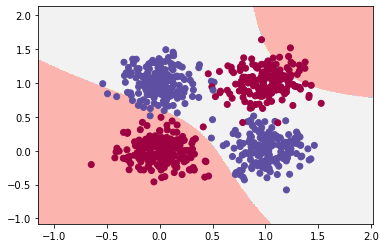

In [4]:
# MODEL 1 here
n0 = 2 # input layer dimensionality
n1 = 50 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.05 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

Epoch 0/100 - loss: 0.679190 - accuracy: 0.486111 - val_loss: 0.632400 - val_accuracy: 0.587500
Epoch 10/100 - loss: 0.620270 - accuracy: 0.937500 - val_loss: 0.619557 - val_accuracy: 0.937500
Epoch 20/100 - loss: 0.596968 - accuracy: 0.916667 - val_loss: 0.599757 - val_accuracy: 0.912500
Epoch 30/100 - loss: 0.578698 - accuracy: 0.886111 - val_loss: 0.583345 - val_accuracy: 0.862500
Epoch 40/100 - loss: 0.562777 - accuracy: 0.881944 - val_loss: 0.568545 - val_accuracy: 0.862500
Epoch 50/100 - loss: 0.548073 - accuracy: 0.886111 - val_loss: 0.554609 - val_accuracy: 0.887500
Epoch 60/100 - loss: 0.534093 - accuracy: 0.902778 - val_loss: 0.541208 - val_accuracy: 0.887500
Epoch 70/100 - loss: 0.520607 - accuracy: 0.918056 - val_loss: 0.528196 - val_accuracy: 0.912500
Epoch 80/100 - loss: 0.507506 - accuracy: 0.927778 - val_loss: 0.515503 - val_accuracy: 0.912500
Epoch 90/100 - loss: 0.494731 - accuracy: 0.943056 - val_loss: 0.503093 - val_accuracy: 0.925000
Accuracy on the test set is  0.

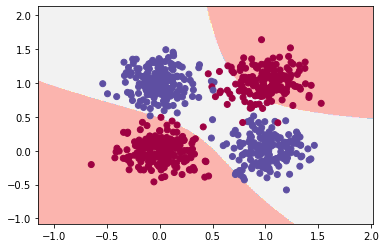

In [5]:
# MODEL 2 here
n0 = 2 # input layer dimensionality
n1 = 100 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.05 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel2 = MyNeuralNet(n0, n1, n2, alpha);
myModel2.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel2.evaluate(X_test, y_test))

# Plot the decision boundary
myModel2.plot_decision_boundary(X_train, y_train)

Epoch 0/300 - loss: 0.679190 - accuracy: 0.486111 - val_loss: 0.632400 - val_accuracy: 0.587500
Epoch 10/300 - loss: 0.620270 - accuracy: 0.937500 - val_loss: 0.619557 - val_accuracy: 0.937500
Epoch 20/300 - loss: 0.596968 - accuracy: 0.916667 - val_loss: 0.599757 - val_accuracy: 0.912500
Epoch 30/300 - loss: 0.578698 - accuracy: 0.886111 - val_loss: 0.583345 - val_accuracy: 0.862500
Epoch 40/300 - loss: 0.562777 - accuracy: 0.881944 - val_loss: 0.568545 - val_accuracy: 0.862500
Epoch 50/300 - loss: 0.548073 - accuracy: 0.886111 - val_loss: 0.554609 - val_accuracy: 0.887500
Epoch 60/300 - loss: 0.534093 - accuracy: 0.902778 - val_loss: 0.541208 - val_accuracy: 0.887500
Epoch 70/300 - loss: 0.520607 - accuracy: 0.918056 - val_loss: 0.528196 - val_accuracy: 0.912500
Epoch 80/300 - loss: 0.507506 - accuracy: 0.927778 - val_loss: 0.515503 - val_accuracy: 0.912500
Epoch 90/300 - loss: 0.494731 - accuracy: 0.943056 - val_loss: 0.503093 - val_accuracy: 0.925000
Epoch 100/300 - loss: 0.482252 

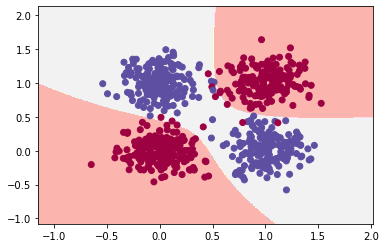

In [6]:
# MODEL 3 here
n0 = 2 # input layer dimensionality
n1 = 100 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.05 # learning rate for gradient descent
epochs = 300 # number of iteration/epochs

# Build a model with 3 layers
myModel3 = MyNeuralNet(n0, n1, n2, alpha);
myModel3.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel3.evaluate(X_test, y_test))

# Plot the decision boundary
myModel3.plot_decision_boundary(X_train, y_train)

In [55]:
# COMPARISONS WITH THE STANDARD LIBRARY 
stl_model = build_model(25, 0.05)
stl_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

In [57]:
stl_accuracy = stl_model.evaluate(X_test, y_test, verbose=0)[1]
model1_accuracy = myModel1.evaluate(X_test, y_test)
model2_accuracy = myModel2.evaluate(X_test, y_test)
model3_accuracy = myModel3.evaluate(X_test, y_test)

print("Accuracy of Standard Library (inner_neurons=25, alpha=0.05, epochs=100) on test set: ", round(stl_accuracy, 3))
print("Accuracy of MyModel1 (inner_neurons=50, alpha=0.05, epochs=100) on test set: ", model1_accuracy)
print("Accuracy of MyModel2 (inner_neurons=100, alpha=0.05, epochs=100) on test set: ", model2_accuracy)
print("Accuracy of MyModel3 (inner_neurons=100, alpha=0.05, epochs=300) on test set: ", model3_accuracy)

Accuracy of Standard Library (inner_neurons=25, alpha=0.05, epochs=100) on test set:  0.975
Accuracy of MyModel1 (inner_neurons=50, alpha=0.05, epochs=100) on test set:  0.755
Accuracy of MyModel2 (inner_neurons=100, alpha=0.05, epochs=100) on test set:  0.925
Accuracy of MyModel3 (inner_neurons=100, alpha=0.05, epochs=300) on test set:  0.965


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My three networks performed pretty well with accuracy of 75.5%, 92.5%, and 96.5% in that order. My best model (with 100 perceptrons in the hidden layer, learning rate of 0.05 and 300 epochs) still underperformed as compared to the standard library's network (with 25 perceptrons in the hidden layer, learning rate of 0.05, and 100 epochs). This discrepancy is present most probably because of the activation function used in the hidden layer. In the standard library implementation, I used the ReLU activation function for the hidden layer, whereas I used the tanh activation function in my own implementation of the neural network. 

My experience implementing this learning algorithm was pretty fun, where I got to learn quite a lot and actually apply what I was learning. It was not easy but also not difficult. There was a good balance between what was given to us and what the assignment required us to finish. I learned the most when I was actually implementing my own neural network. 

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!